# Deutsch's Algorithm Demo

This notebook consists of some code that will initialize a two qubit circuit, draw the circuit diagram, and then plot the state of the two-qubit system using the Bloch Sphere

In [1]:
import qiskit
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector, Operator
import matplotlib.pyplot as plt
import numpy as np
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit import transpile
from qiskit_ibm_runtime.fake_provider import FakeTorino, FakeMarrakesh
from qiskit_ibm_runtime import SamplerV2

# show qiskit version
print(f"Qiskit version: {qiskit.__version__}")

Qiskit version: 2.2.1


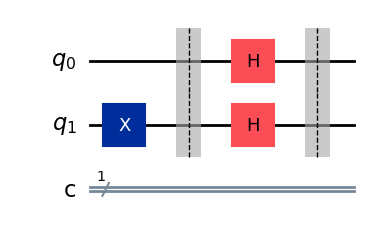

In [2]:
# Initialize Quantum Circuit with 2 Qubits and setup to before oracle
qc = QuantumCircuit(2,1)

#qc.id(0)
qc.x(1)
qc.barrier()

qc.h(0)
qc.h(1)
qc.barrier()

qc.draw('mpl')

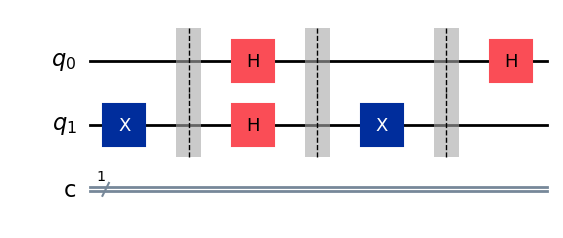

In [3]:
# function containing each type of oracle
def oracle(mode):
    match mode:
        case 1:
            qc.id(0)
            qc.id(1)
            qc.barrier()
        case 2:
            qc.cx(0, 1)
            qc.barrier()
        case 3:
            qc.cx(0, 1)
            #qc.id(0)
            qc.x(1)
            qc.barrier()
        case 4:
            qc.x(1)
            #qc.id(0)
            qc.barrier()

oracle(4)
qc.h(0)
qc.draw('mpl')

In [4]:
# Get Statevector
state = Statevector.from_instruction(qc)

# Display the Unitary Matrix
unitary = Operator(qc).data
print("Unitary matrix:")
display(print(unitary))

# Display Statevector
matrix_form = np.array(state).reshape(-1, 1)
print("\nStatevector as a matrix:")
display(print(matrix_form))

#LaTeX output
print("\nStatevector in LaTeX output:")
display(state.draw(output='latex'))

Unitary matrix:
[[-0.70710678+0.j  0.        +0.j  0.70710678+0.j  0.        +0.j]
 [ 0.        +0.j -0.70710678+0.j  0.        +0.j  0.70710678+0.j]
 [ 0.70710678+0.j  0.        +0.j  0.70710678+0.j  0.        +0.j]
 [ 0.        +0.j  0.70710678+0.j  0.        +0.j  0.70710678+0.j]]


None


Statevector as a matrix:
[[-7.07106781e-01+0.j]
 [-2.29934717e-17+0.j]
 [ 7.07106781e-01+0.j]
 [ 2.29934717e-17+0.j]]


None


Statevector in LaTeX output:


<IPython.core.display.Latex object>

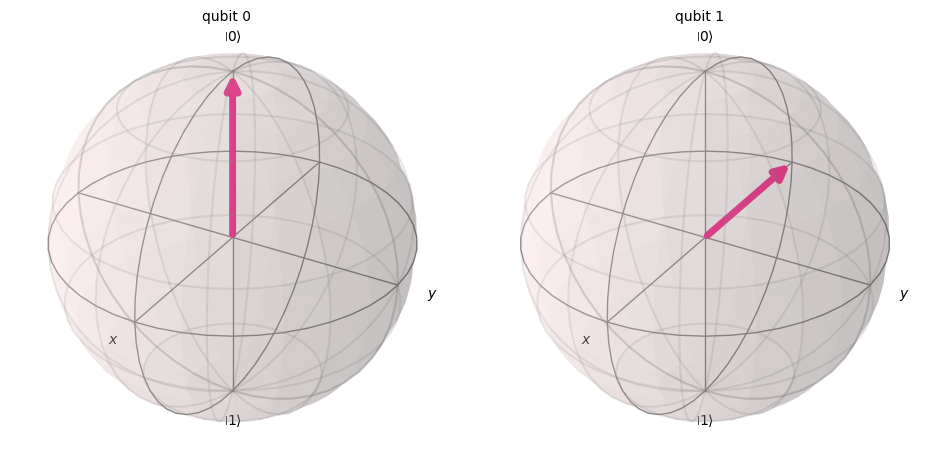

In [5]:
# Display Bloch Sphere
plot_bloch_multivector(state)

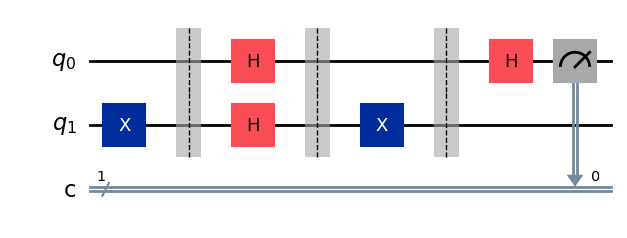

In [6]:
qc.measure(0, 0)
qc.draw('mpl')

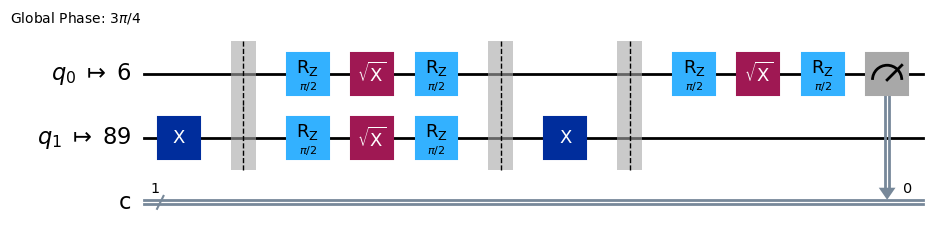

In [7]:
backend = FakeMarrakesh()
transpiled_circuit = transpile(qc, backend)
transpiled_circuit.draw('mpl', style="iqp")

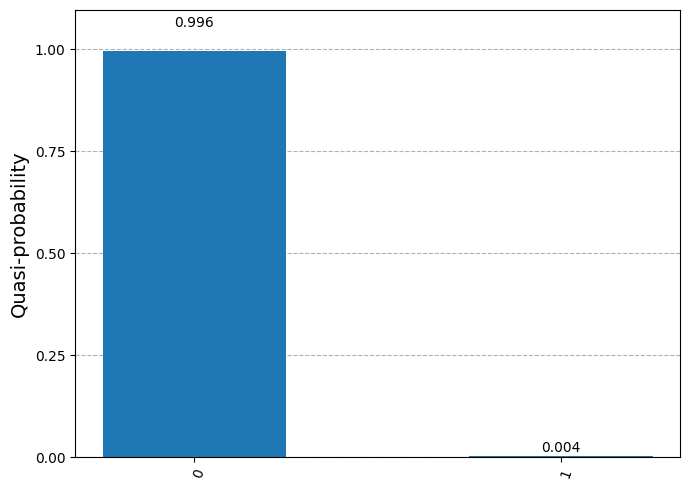

In [12]:
# Run Job for n_shots
n_shots = 2**12
sampler = SamplerV2(backend)
job = backend.run(transpiled_circuit, shots=n_shots)
result = job.result()

# Get counts and output distribution
counts = result.get_counts(transpiled_circuit)
plot_distribution(counts)

In [13]:
print(counts)
if (counts.get("0", 0) > n_shots * 0.95 or counts.get("1", 0) > n_shots * 0.95): 
    print("constant")
else: 
    print("balanced")

{'0': 4081, '1': 15}
constant
